In [518]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import datetime
import numpy as np
from math import sqrt


In [519]:
log_data=pd.read_csv('../Datas/log1.csv',header=None)

In [520]:
log_data

,0,1,2,3
0,busanmovie5,1591524325900,2445509700,...
1,busanmovie1,1591524329458,58600800,...
2,busanmovie6,1591524329683,54576500,...
3,busanmovie1,1591524329894,47667400,...
4,tourguide1,1591524330100,53428500,...
...,...,...,...,...
2828,nationalparkstatus,1591524811658,28219600,...
2829,roadkillstatus,1591524811830,28280000,...
2830,tourguide,1591524811993,49620900,...
2831,endangeredanimals1,1591524812193,25620100,...


In [521]:
log_data.columns=['Dataset','Query Time','Execution Time','ManagerId']

In [522]:
log_data.info

<bound method DataFrame.info of                  Dataset     Query Time  Execution Time ManagerId
0            busanmovie5  1591524325900      2445509700       ...
1            busanmovie1  1591524329458        58600800       ...
2            busanmovie6  1591524329683        54576500       ...
3            busanmovie1  1591524329894        47667400       ...
4             tourguide1  1591524330100        53428500       ...
...                  ...            ...             ...       ...
2828  nationalparkstatus  1591524811658        28219600       ...
2829      roadkillstatus  1591524811830        28280000       ...
2830           tourguide  1591524811993        49620900       ...
2831  endangeredanimals1  1591524812193        25620100       ...
2832          tourguide1  1591524812371        43877400       ...

[2833 rows x 4 columns]>

In [523]:
log_data.describe()

,Query Time,Execution Time
count,2.833000e+03,2.833000e+03
mean,1.591525e+12,3.077180e+07
std,1.377986e+05,4.820137e+07
min,1.591524e+12,1.826380e+07
25%,1.591524e+12,2.528870e+07
50%,1.591525e+12,2.642720e+07
75%,1.591525e+12,2.856920e+07
max,1.591525e+12,2.445510e+09


In [524]:
X=log_data[['Dataset','Query Time','Execution Time']]

In [525]:
X

,Dataset,Query Time,Execution Time
0,busanmovie5,1591524325900,2445509700
1,busanmovie1,1591524329458,58600800
2,busanmovie6,1591524329683,54576500
3,busanmovie1,1591524329894,47667400
4,tourguide1,1591524330100,53428500
...,...,...,...
2828,nationalparkstatus,1591524811658,28219600
2829,roadkillstatus,1591524811830,28280000
2830,tourguide,1591524811993,49620900
2831,endangeredanimals1,1591524812193,25620100


In [526]:
X.describe()

,Query Time,Execution Time
count,2.833000e+03,2.833000e+03
mean,1.591525e+12,3.077180e+07
std,1.377986e+05,4.820137e+07
min,1.591524e+12,1.826380e+07
25%,1.591524e+12,2.528870e+07
50%,1.591525e+12,2.642720e+07
75%,1.591525e+12,2.856920e+07
max,1.591525e+12,2.445510e+09


In [527]:
execute_mean=X[['Execution Time']].mean()
execute_std=X[['Execution Time']].std()
X[['Execution Time']]=(X[['Execution Time']]-execute_mean)/execute_std * 10

C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [528]:
query_min=X[['Query Time']].min()
X[['Query Time']]=(X[['Query Time']]-query_min)

In [529]:
outliar_removed_index=X[X[['Execution Time']]<2]['Execution Time'].dropna().index
X=X.iloc[outliar_removed_index]

In [530]:
Dataset_Query=X.groupby('Dataset')['Query Time'].sum().to_frame().reset_index()

In [531]:
Dataset_Execution=X.groupby('Dataset')['Execution Time'].mean().to_frame().reset_index()

In [532]:
Dataset_Query_Frequency=X.groupby('Dataset')['Query Time'].count().to_frame().reset_index()
Dataset_Query_Frequency.rename(columns = {'Query Time' : 'Query Count'}, inplace = True)

In [533]:
X=pd.merge(Dataset_Query,Dataset_Execution,on='Dataset')
X=pd.merge(X,Dataset_Query_Frequency,on='Dataset')

In [534]:
count_mean=X[['Query Count']].mean()
count_std=X[['Query Count']].std()
X[['Query Count']]=(X[['Query Count']]-count_mean)/count_std

In [535]:
query_mean=X[['Query Time']].mean()
query_std=X[['Query Time']].std()
X[['Query Time']]=(X[['Query Time']]-query_mean) / query_std

In [536]:
X

,Dataset,Query Time,Execution Time,Query Count
0,busanmovie1,0.674722,-0.857548,0.847707
1,busanmovie2,-1.065483,-0.739944,-0.512810
2,busanmovie3,-1.728874,-0.825591,-1.510523
3,busanmovie4,-1.196107,-0.604405,-1.057018
4,busanmovie5,-0.209938,-0.825927,-0.059305
5,busanmovie6,0.051797,-0.796543,-0.195356
6,endangeredanimals,-0.901212,-1.012544,-1.102368
7,endangeredanimals1,-0.433569,-0.917315,-0.059305
8,koreanhistory,1.408911,-0.286632,1.527966
9,koreanhistory1,-0.368807,-0.177881,-0.512810


In [537]:
query_hot=set(X[X['Query Time']>X['Query Time'].mean()].index)

In [538]:
execution_hot=set(X[X['Execution Time']>X['Execution Time'].mean()].index)

In [539]:
count_hot=set(X[X['Query Count']>X['Query Count'].mean()].index)

In [540]:
print(query_hot)
print(execution_hot)
print(count_hot)

{0, 5, 8, 11, 12, 13, 14, 17, 19, 20, 21, 23, 25}
{1, 3, 8, 9, 10, 22, 23, 24, 25}
{0, 8, 11, 12, 13, 17, 19, 20}


In [541]:
Hot_Dataset_Counts=round(len(X)*0.3)

In [542]:
hot_index=[]

# Query Time and Execution Time and Query Count
intersect=query_hot.intersection(execution_hot).intersection(count_hot)
hot_index=[data for data in intersect]

intersects=[]
#Query Time and Query Count
intersects.extend(query_hot.intersection(count_hot))
#Execution Time and Query Count
intersects.extend(execution_hot.intersection(count_hot))
#Query Time and Execution Time
intersects.extend(query_hot.intersection(execution_hot))
print(intersects)
while len(hot_index) < Hot_Dataset_Counts:
    data=intersects.pop(0)
    if data in hot_index:
        continue
    hot_index.append(data)

[0, 8, 11, 12, 13, 17, 19, 20, 8, 8, 25, 23]


In [543]:
hot_index

[8, 0, 11, 12, 13, 17, 19, 20]

In [544]:
Y=pd.DataFrame(np.zeros(26))

In [545]:
hots=list(hot_index)

In [546]:
Y.loc[hots]=1.0

In [547]:
Y

,0
0,1.0
1,0.0
2,0.0
3,0.0
4,0.0
5,0.0
6,0.0
7,0.0
8,1.0
9,0.0


In [548]:
X=X[["Query Time","Execution Time","Query Count"]]

In [549]:
X

,Query Time,Execution Time,Query Count
0,0.674722,-0.857548,0.847707
1,-1.065483,-0.739944,-0.512810
2,-1.728874,-0.825591,-1.510523
3,-1.196107,-0.604405,-1.057018
4,-0.209938,-0.825927,-0.059305
5,0.051797,-0.796543,-0.195356
6,-0.901212,-1.012544,-1.102368
7,-0.433569,-0.917315,-0.059305
8,1.408911,-0.286632,1.527966
9,-0.368807,-0.177881,-0.512810


In [550]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [551]:
KNN=KNeighborsClassifier(n_neighbors = 5)
model=KNN.fit(X_train,y_train.values.ravel())

In [552]:
results=[]

predict=model.predict(X_test)
results.append(round(accuracy_score(y_test,predict)*100))

In [553]:
results

[89.0]

In [554]:
def euclidean_distance(X,num1,num2):
    distance = 0.000000
    distance += (X.loc[num1]['Query Time']- X.loc[num2]['Query Time'])**2
    distance += (X.loc[num1]['Execution Time']- X.loc[num2]['Execution Time'])**2
    distance += (X.loc[num1]['Query Count']- X.loc[num2]['Query Count'])**2
    return sqrt(distance)

In [555]:
distance = euclidean_distance(X,0,17)
print(distance)

0.34301092529704225


In [556]:
def get_neighbors(train, num1, num_neighbors):
	distances = list()
	for i in range(0, len(train)-1):
		dist = euclidean_distance(X,num1, i)
		distances.append((i, dist))
	distances.sort(key=lambda tup: tup[1])
	neighbors = list()
	for i in range(1, num_neighbors+1):
		neighbors.append(distances[i][0])
	return neighbors

In [557]:
neighbors = get_neighbors(X, 0, 5)
#2번째 parameter에 hot/cold 판단할 index를 삽입합니다
for neighbor in neighbors:
	print(neighbor)

12
17
11
19
21


In [558]:
n = list(neighbors)
n.sort()

In [559]:
hot_execution_index=X[X[['Execution Time']]>X[['Execution Time']].mean()]['Execution Time'].dropna().index

In [560]:
hot_query_index=X[X['Query Time']>X['Query Time'].mean()].index

In [561]:
hot_count_index=X[X['Query Count']>X['Query Count'].mean()].index

In [562]:
hot_execution_index

Int64Index([1, 3, 8, 9, 10, 22, 23, 24, 25], dtype='int64')

In [563]:
hot_query_index

Int64Index([0, 5, 8, 11, 12, 13, 14, 17, 19, 20, 21, 23, 25], dtype='int64')

In [564]:
hot_count_index

Int64Index([0, 8, 11, 12, 13, 17, 19, 20], dtype='int64')

In [565]:
hot_index.sort()

In [566]:
hot_index

[0, 8, 11, 12, 13, 17, 19, 20]

In [567]:
cnt = 0
hot_list = []
# X의 한 index에서 가장 가까운 5개(accuracy감안)원소 중 
#Hot_index 원소에 포함되는 원소가 3개 이상이라면
#Hot 으로 두었고, 아니라면 Cold 로 두었습니다.

print('Hot index: ',hot_index,'\n')

for k in range(0,len(X)):
    neighbors = get_neighbors(X,k,5)
    n = list(neighbors)
    n.sort()
    print('원소:',k)
    print('최근접 5개 index: ',n)
    for i in range(1,len(n)):
        for j in range(0, len(hot_index)):
            if(n[i] == hot_index[j]):
                    cnt += 1;
    
    if(cnt >= 3):
        hot_list.append(k)
        print('Hot!','\n')
    else:
            print('Cold!','\n')
    cnt = 0

print("KNN 알고리즘을 통한 hot_list: ", hot_list)

Hot index:  [0, 8, 11, 12, 13, 17, 19, 20] 

원소: 0
최근접 5개 index:  [11, 12, 17, 19, 21]
Hot! 

원소: 1
최근접 5개 index:  [3, 6, 7, 15, 22]
Cold! 

원소: 2
최근접 5개 index:  [1, 3, 6, 22, 24]
Cold! 

원소: 3
최근접 5개 index:  [1, 2, 6, 22, 24]
Cold! 

원소: 4
최근접 5개 index:  [5, 7, 15, 16, 23]
Cold! 

원소: 5
최근접 5개 index:  [4, 14, 16, 18, 23]
Cold! 

원소: 6
최근접 5개 index:  [1, 2, 3, 10, 22]
Cold! 

원소: 7
최근접 5개 index:  [4, 5, 15, 16, 18]
Cold! 

원소: 8
최근접 5개 index:  [0, 11, 12, 17, 20]
Hot! 

원소: 9
최근접 5개 index:  [4, 5, 10, 18, 23]
Cold! 

원소: 10
최근접 5개 index:  [4, 5, 16, 18, 23]
Cold! 

원소: 11
최근접 5개 index:  [5, 14, 19, 21, 23]
Cold! 

원소: 12
최근접 5개 index:  [0, 11, 17, 19, 21]
Hot! 

원소: 13
최근접 5개 index:  [0, 8, 12, 17, 20]
Hot! 

원소: 14
최근접 5개 index:  [5, 11, 16, 19, 21]
Cold! 

원소: 15
최근접 5개 index:  [4, 5, 7, 16, 18]
Cold! 

원소: 16
최근접 5개 index:  [4, 5, 14, 18, 21]
Cold! 

원소: 17
최근접 5개 index:  [0, 11, 12, 14, 19]
Hot! 

원소: 18
최근접 5개 index:  [4, 5, 10, 14, 16]
Cold! 

원소: 19
최근접 5개 index:  [5, 11, 14, 16

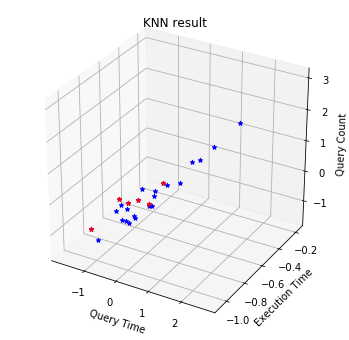

In [517]:
fig=plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')

for i in range(0, len(X)):
    ax.scatter(X['Query Time'][i],X['Execution Time'][i],X['Query Count'][i],marker='*',c='blue')
    
for i in range(0, len(hot_list)):
    ax.scatter(X['Query Time'][i],X['Execution Time'][i],X['Query Count'][i],marker='*',c='red')

ax.set_xlabel("Query Time");
ax.set_ylabel("Execution Time");
ax.set_zlabel("Query Count");
ax.set_title("KNN result");
plt.show()

In [464]:
a = 0
for k in range(0,5):
    n[k]

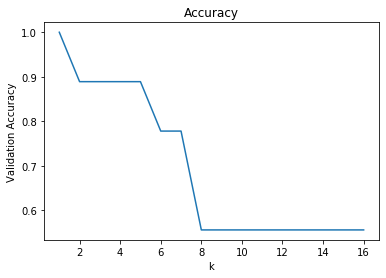

In [465]:
k_list = range(1,17)
accuracies = []
for k in k_list:
  KNN = KNeighborsClassifier(n_neighbors = k)
  KNN.fit(X_train,y_train.values.ravel())
  accuracies.append(KNN.score(X_test, y_test))
plt.plot(k_list, accuracies)
plt.xlabel("k")
plt.ylabel("Validation Accuracy")
plt.title("Accuracy")
plt.show()